# <center> Machine Learning Assignment 3 <br><br>Pawan Kumar Chatterjee <br><br> 20051478 </center>

## Question 1:

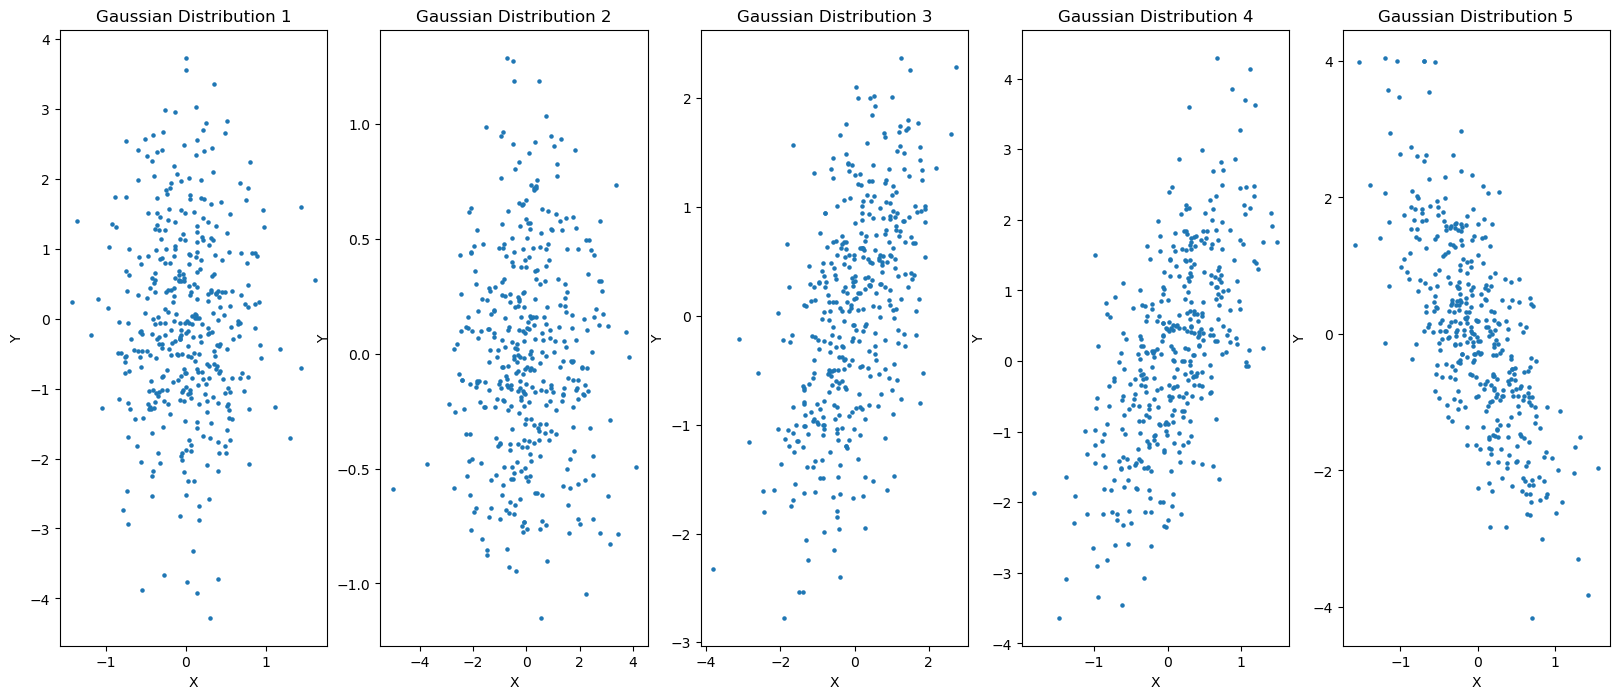

In [14]:
import numpy as np
import matplotlib.pyplot as plt
m = np.array([0, 0])
S1 = np.array([[0.2, 0], [0, 2]])
S2 = np.array([[2, 0], [0, 0.2]])
S3 = np.array([[1, 0.5], [0.5, 1]])
S4 = np.array([[0.3, 0.5], [0.5, 2]])
S5 = np.array([[0.3, -0.5], [-0.5, 2]])
cov = [S1, S2, S3, S4, S5]
fig, axs = plt.subplots(1, 5, figsize=(20,8))
for i in range(5):
    data = np.random.multivariate_normal(m, cov[i], 400)
    axs[i].scatter(data[:, 0], data[:, 1], s=5)
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')
    axs[i].set_title('Gaussian Distribution {}'.format(i+1))

plt.show()

## Question 2:

In [2]:
import numpy as np
from scipy.stats import multivariate_normal

# Set up the parameters
m1 = np.array([0, 0])
m2 = np.array([1, 2])
S = np.array([[0.8, 0.2], [0.2, 0.8]])

# Generate the datasets
X1 = np.random.multivariate_normal(m1, S, size=1000)
X2 = np.random.multivariate_normal(m2, S, size=5000)

# Compute the priors
prior1 = len(X1) / (len(X1) + len(X2))
prior2 = len(X2) / (len(X1) + len(X2))

# Compute the likelihoods for X1
likelihood1 = multivariate_normal(mean=m1, cov=S).pdf(X1)
likelihood2 = multivariate_normal(mean=m2, cov=S).pdf(X1)

# Compute the posterior probabilities for X1
posterior1 = likelihood1 * prior1
posterior2 = likelihood2 * prior2

# Compute the Bayes decision rule for X1
prediction = np.argmax(np.vstack((posterior1, posterior2)), axis=0) + 1

# Compute the classification error for X1
true_labels = np.ones(len(X1), dtype=int)
true_labels[len(X1) // 2:] = 2
classification_error = np.mean(prediction != true_labels)
print(f"Classification error on X1: {classification_error:.4f}")

# Compute the likelihoods for X2
likelihood1 = multivariate_normal(mean=m1, cov=S).pdf(X2)
likelihood2 = multivariate_normal(mean=m2, cov=S).pdf(X2)

# Compute the posterior probabilities for X2
posterior1 = likelihood1 * prior1
posterior2 = likelihood2 * prior2

# Compute the Bayes decision rule for X2
prediction = np.argmax(np.vstack((posterior1, posterior2)), axis=0) + 1

# Compute the classification error for X2
true_labels = np.ones(len(X2), dtype=int)
true_labels[len(X2) // 2:] = 2
classification_error = np.mean(prediction != true_labels)
print(f"Classification error on X2: {classification_error:.4f}")

Classification error on X1: 0.5110
Classification error on X2: 0.5038
